In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import chardet

In [140]:
#Data Preparation of Climate dataset
climate_data = pd.read_excel('Dataset/archive/Merged_climate_data.xlsx')
climate_data.columns = climate_data.columns.str.replace('-07', '')
climate_data

,code,name,1950,1951,1952,1953,1954,1955,1956,1957,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,SheetName
0,AGO,Angola,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,fd
1,AND,Andorra,12.52,13.23,10.87,12.00,12.39,10.18,13.64,12.21,...,11.38,11.73,9.75,9.27,10.27,10.99,9.85,10.87,9.34,fd
2,ASM,American Samoa (U.S.),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,fd
3,AGO,Angola,45.40,62.05,65.64,84.28,52.09,84.92,86.49,106.08,...,87.80,89.09,91.35,90.15,97.34,87.53,92.94,87.56,100.19,pr
4,AND,Andorra,79.64,111.16,93.81,77.02,87.54,83.76,86.19,85.32,...,86.50,115.51,110.31,86.19,83.41,91.09,124.84,95.41,104.33,pr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,ALB,Albania,86.20,90.25,111.80,74.71,100.59,124.79,115.01,98.20,...,113.45,115.90,116.14,95.40,127.12,96.53,125.68,105.76,95.45,pr
620,DZA,Algeria,5.15,7.24,4.92,6.25,5.42,6.07,5.13,8.44,...,6.15,5.65,6.11,5.88,5.24,4.86,7.42,5.96,4.23,pr
621,AFG,Afghanistan,10.00,10.92,11.05,11.35,11.10,11.94,11.69,9.83,...,11.59,12.83,12.31,12.95,13.74,13.53,13.72,12.96,12.31,tas
622,ALB,Albania,13.19,12.81,12.98,11.92,11.51,12.19,11.40,12.26,...,13.06,13.20,13.15,13.26,13.16,13.13,13.73,13.57,13.37,tas


In [141]:
# Unpivot the DataFrame
climate_data = pd.melt(climate_data, id_vars=['code', 'name', 'SheetName'], var_name='Year', value_name='Value')
climate_data

,code,name,SheetName,Year,Value
0,AGO,Angola,fd,1950,0.00
1,AND,Andorra,fd,1950,12.52
2,ASM,American Samoa (U.S.),fd,1950,0.00
3,AGO,Angola,pr,1950,45.40
4,AND,Andorra,pr,1950,79.64
...,...,...,...,...,...
44299,ALB,Albania,pr,2020,95.45
44300,DZA,Algeria,pr,2020,4.23
44301,AFG,Afghanistan,tas,2020,12.31
44302,ALB,Albania,tas,2020,13.37


In [142]:
climate_data.columns = ['Country_Code', 'Country', 'Climate Variables', 'Year', 'Value']

In [143]:
#Pivot the Climate Variables values as columns
climate_data = climate_data.pivot_table(index=['Country_Code', 'Country', 'Year'], columns='Climate Variables', values='Value')
climate_data.reset_index(inplace=True)
climate_data

Climate Variables,Country_Code,Country,Year,fd,pr,tas
0,ABW,Aruba (Neth.),1950,0.0,87.00,25.89
1,ABW,Aruba (Neth.),1951,0.0,50.20,26.56
2,ABW,Aruba (Neth.),1952,0.0,44.75,26.58
3,ABW,Aruba (Neth.),1953,0.0,44.66,26.59
4,ABW,Aruba (Neth.),1954,0.0,70.32,26.07
...,...,...,...,...,...,...
14763,ZWE,Zimbabwe,2016,0.0,59.72,22.36
14764,ZWE,Zimbabwe,2017,0.0,81.14,21.23
14765,ZWE,Zimbabwe,2018,0.0,56.38,21.93
14766,ZWE,Zimbabwe,2019,0.0,50.78,22.45


In [144]:
climate_data.rename(columns={'fd': 'No of frost days', 'pr': 'Precipitation', 'tas':'Avg temperature'}, inplace=True)

In [145]:
# Data Visualization 
# ['New Zealand', 'Denmark', 'Argentina', 'Uruguay', 'Ireland']
# [Ethiopia, Nigeria, Kenya, India, Cambodia, Indonesia]
# selected_countries_1 = ['New Zealand', 'Denmark', 'Argentina', 'Uruguay', 'Ireland']
# selected_countries_2 = ['Ethiopia', 'Nigeria', 'Kenya', 'India', 'Cambodia', 'Indonesia']

# filtered_data_1 = climate_data[climate_data['Country'].isin(selected_countries_1)]
# filtered_data_2 = climate_data[climate_data['Country'].isin(selected_countries_2)]


# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plt.hist(filtered_data_1['Avg temperature'], bins=25, color='blue', alpha=0.7)
# plt.title('Average Temperature - Group 1')
# plt.xlabel('Temperature (°C)')
# plt.ylabel('Frequency')

# plt.subplot(1, 2, 2)
# plt.hist(filtered_data_2['Avg temperature'], bins=25, color='green', alpha=0.7)
# plt.title('Average Temperature - Group 2')
# plt.xlabel('Temperature (°C)')
# plt.ylabel('Frequency')

# plt.tight_layout()
# plt.show()


In [146]:
# Data Visualization 
# ['New Zealand', 'Denmark', 'Argentina', 'Uruguay', 'Ireland']
# [Ethiopia, Nigeria, Kenya, India, Cambodia, Indonesia]

def plot_histplot(df, factor, xlabel):
    # Create lists of countries to include in each subplot
    countries_group1 = ['New Zealand', 'Denmark', 'Argentina', 'Uruguay', 'Ireland']
    countries_group2 = ['Ethiopia', 'Nigeria', 'Kenya', 'India', 'Cambodia', 'Indonesia']

    # Create a dictionary to map colors to countries
    country_colors = {
        'New Zealand': 'blue',
        'Denmark': 'red',
        'Argentina': 'green',
        'Uruguay': 'orange',
        'Ireland': 'purple',
        'Ethiopia': 'brown',
        'Nigeria': 'pink',
        'Kenya': 'gray',
        'India': 'cyan',
        'Cambodia': 'magenta',
        'Indonesia': 'lime',
    }

    # Filter the data for the selected countries
    filtered_data = df[df['Country'].isin(countries_group1 + countries_group2)]
#     filtered_data = filtered_data[~pd.isna(filtered_data)]

    # Create subplots with shared x-axis limits
    fig, axes = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

    # Subplot 1 for countries_group1
    axes[0].set_title('Group 1: '+factor)
    for country in countries_group1:
        axes[0].hist(filtered_data[filtered_data['Country'] == country][factor], bins=20, alpha=0.5, label=country, color=country_colors[country])
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel('Frequency')
    axes[0].legend(loc='upper right')

    # Subplot 2 for countries_group2
    axes[1].set_title('Group 2: '+factor)
    for country in countries_group2:
        axes[1].hist(filtered_data[filtered_data['Country'] == country][factor], bins=20, alpha=0.5, label=country, color=country_colors[country])
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel('Frequency')
    axes[1].legend(loc='upper left')

    # Set the same x-axis limits for both subplots
#     plt.xlim([min(filtered_data[factor]), max(filtered_data[factor])])

    plt.tight_layout()
    plt.show()


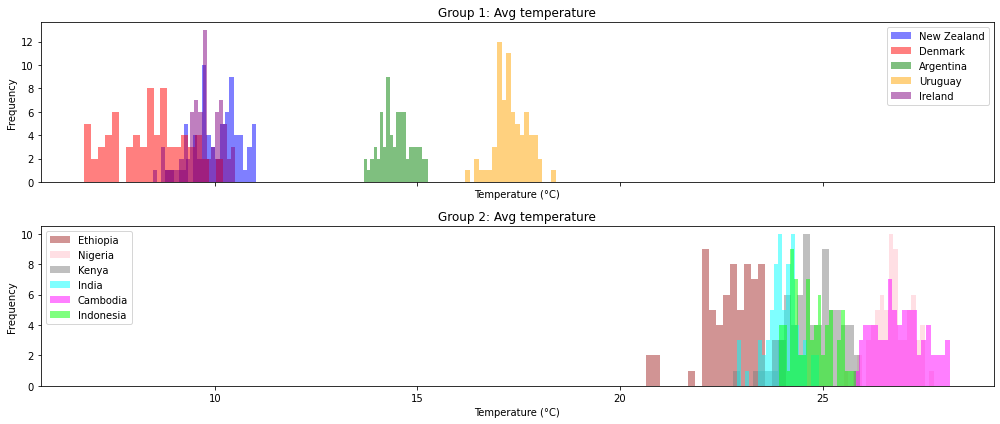

In [147]:
plot_histplot(climate_data, 'Avg temperature', 'Temperature (°C)')

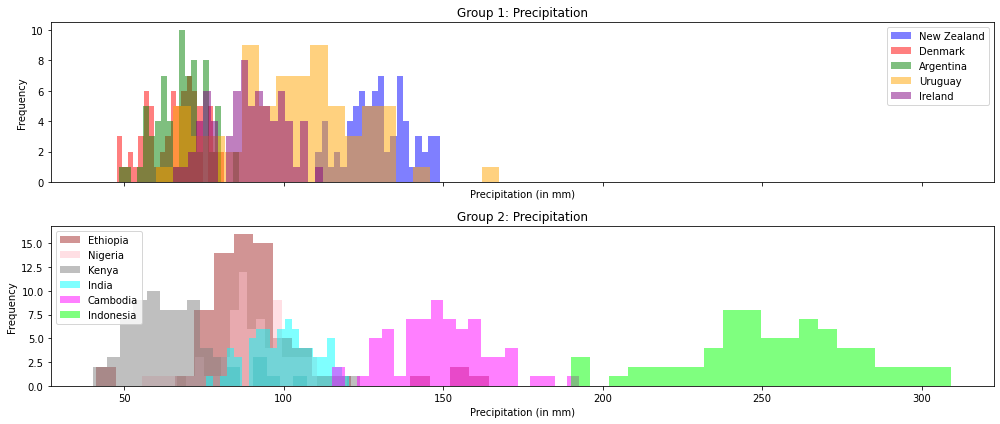

In [148]:
plot_histplot(climate_data, 'Precipitation', 'Precipitation (in mm)')

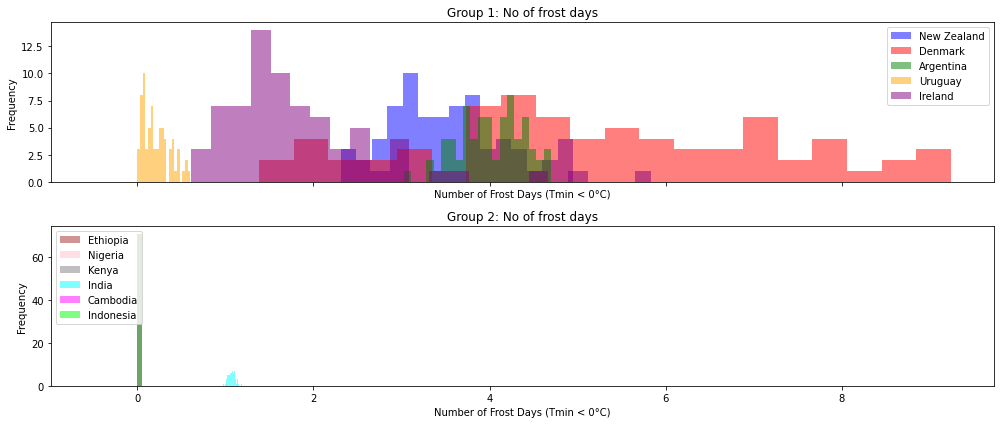

In [149]:
plot_histplot(climate_data, 'No of frost days', 'Number of Frost Days (Tmin < 0°C)')

Observations:


In [150]:
#Import World Bank Indicators data
world_bank_data = pd.read_csv('Dataset/archive/World_Bank_Indicators.csv')
world_bank_data.dropna(inplace = True)
world_bank_data.columns = [col.split(' [')[0] for col in world_bank_data.columns]
world_bank_data.head(5)

,Country Name,Country Code,Series Name,Series Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,AFG,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,..,..,..,..,..,..,...,375643168.3,334839124.6,300161714.8,276984771.4,284853905.2,274596496.6,276923268.4,628740557.2,1185327218,..
1,Afghanistan,AFG,Control of Corruption: Estimate,CC.EST,..,..,..,..,..,..,...,-1.44590842723846,-1.36474287509918,-1.3485871553421,-1.53404927253723,-1.52172565460205,-1.48977172374725,-1.40771043300629,-1.48053777217865,-1.14237689971924,..
2,Albania,ALB,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,..,..,..,..,..,..,...,96755468.2,150856823.2,243583720.9,387084198.2,488777110.1,470321203.4,447707759.2,627019436.4,733945608.9,..
3,Albania,ALB,Control of Corruption: Estimate,CC.EST,..,..,..,..,..,..,...,-0.750955939292908,-0.586141347885132,-0.520959854125977,-0.44898048043251,-0.458256989717484,-0.524145126342773,-0.543374061584473,-0.551931083202362,-0.5559241771698,..
4,Algeria,DZA,"Use of IMF credit (DOD, current US$)",DT.DOD.DIMF.CD,..,..,..,..,..,..,...,1845203857.4,1735936449.6,1660361592.5,1610758149.3,1706376276.2,1666425596.1,1656880871,1725708072,4306075776.8,..


In [151]:
world_bank_data.drop('Series Code', axis=1, inplace=True)

In [152]:
world_bank_data = pd.melt(world_bank_data, id_vars=['Country Name', 'Country Code', 'Series Name'], var_name='Year', value_name='Value')
# world_bank_data.to_csv('World_Bank_Ind.csv', index=False)

In [153]:
# world_bank_data.replace('..', 0.0, inplace=True)
world_bank_data['Value'] = world_bank_data['Value'].replace('..', pd.NA)

# Drop rows where 'Value' is NaN
world_bank_data = world_bank_data.dropna(subset=['Value'])

In [154]:
world_bank_data = world_bank_data.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Series Name', values='Value')
world_bank_data.reset_index(inplace=True)
world_bank_data.rename(columns={'Country Name': 'Country'}, inplace=True)
world_bank_data

Series Name,Country,Country Code,Year,Control of Corruption: Estimate,"Use of IMF credit (DOD, current US$)"
0,Afghanistan,AFG,1996,-1.291705,NaN
1,Afghanistan,AFG,1998,-1.176012,NaN
2,Afghanistan,AFG,2000,-1.271724,NaN
3,Afghanistan,AFG,2002,-1.251137,NaN
4,Afghanistan,AFG,2003,-1.344180,NaN
...,...,...,...,...,...
7548,Zimbabwe,ZWE,2017,-1.281081,4.821848e+08
7549,Zimbabwe,ZWE,2018,-1.227581,4.708956e+08
7550,Zimbabwe,ZWE,2019,-1.273280,4.681985e+08
7551,Zimbabwe,ZWE,2020,-1.289440,4.876475e+08


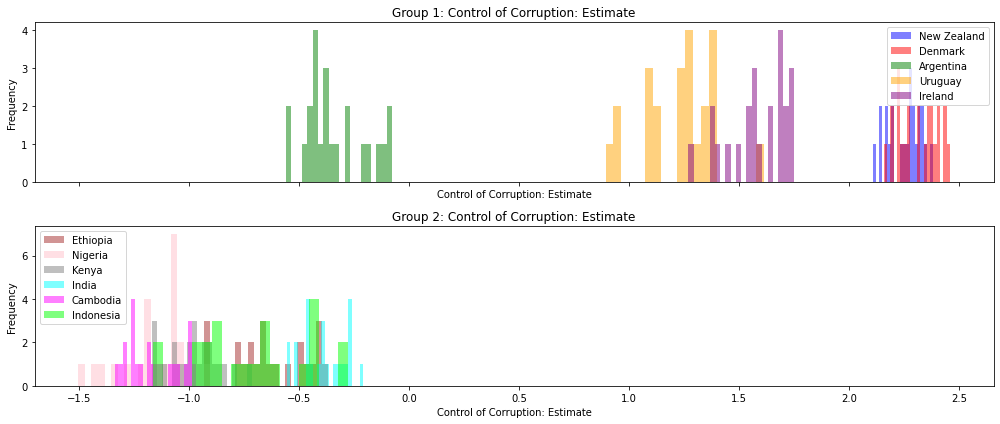

In [155]:
plot_histplot(world_bank_data, 'Control of Corruption: Estimate', 'Control of Corruption: Estimate')

In [156]:
#Import World Bank Education Data
world_bank_edu = pd.read_csv('Dataset/archive/World_Bank_Education.csv')
world_bank_edu.dropna(inplace = True)
world_bank_edu.columns = [col.split(' [')[0] for col in world_bank_edu.columns]
world_bank_edu.drop('Series Code', axis=1, inplace=True)
world_bank_edu

,Country Name,Country Code,Series,1960,1961,1962,1963,1964,1965,1966,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,AFG,"Gross enrolment ratio, primary to tertiary, bo...",..,..,..,..,..,..,..,...,65.79363,..,..,..,64.43013,..,..,..,..,..
1,Afghanistan,AFG,"Gross enrolment ratio, primary to tertiary, fe...",..,..,..,..,..,..,..,...,51.30789,..,..,..,49.19871,..,..,..,..,..
2,Afghanistan,AFG,"Gross enrolment ratio, primary to tertiary, ma...",..,..,..,..,..,..,..,...,79.51016,..,..,..,78.91602,..,..,..,..,..
3,Albania,ALB,"Gross enrolment ratio, primary to tertiary, bo...",..,..,..,..,..,..,..,...,88.73256,87.41363,85.23001,84.96134,83.89356,85.01313,..,..,..,..
4,Albania,ALB,"Gross enrolment ratio, primary to tertiary, fe...",..,..,..,..,..,..,..,...,92.07545,90.64685,88.91327,89.25792,88.64442,90.16838,..,..,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,Zambia,ZMB,"Gross enrolment ratio, primary to tertiary, fe...",..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
812,Zambia,ZMB,"Gross enrolment ratio, primary to tertiary, ma...",..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
813,Zimbabwe,ZWE,"Gross enrolment ratio, primary to tertiary, bo...",..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
814,Zimbabwe,ZWE,"Gross enrolment ratio, primary to tertiary, fe...",..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [157]:
world_bank_edu = pd.melt(world_bank_edu, id_vars=['Country Name', 'Country Code', 'Series'], var_name='Year', value_name='Value')
world_bank_edu

,Country Name,Country Code,Series,Year,Value
0,Afghanistan,AFG,"Gross enrolment ratio, primary to tertiary, bo...",1960,..
1,Afghanistan,AFG,"Gross enrolment ratio, primary to tertiary, fe...",1960,..
2,Afghanistan,AFG,"Gross enrolment ratio, primary to tertiary, ma...",1960,..
3,Albania,ALB,"Gross enrolment ratio, primary to tertiary, bo...",1960,..
4,Albania,ALB,"Gross enrolment ratio, primary to tertiary, fe...",1960,..
...,...,...,...,...,...
52219,Zambia,ZMB,"Gross enrolment ratio, primary to tertiary, fe...",2023,..
52220,Zambia,ZMB,"Gross enrolment ratio, primary to tertiary, ma...",2023,..
52221,Zimbabwe,ZWE,"Gross enrolment ratio, primary to tertiary, bo...",2023,..
52222,Zimbabwe,ZWE,"Gross enrolment ratio, primary to tertiary, fe...",2023,..


In [158]:
# world_bank_edu.replace('..', 0.0, inplace=True) #Imputation?
world_bank_edu['Value'] = world_bank_edu['Value'].replace('..', pd.NA)

# Drop rows where 'Value' is NaN
world_bank_edu = world_bank_edu.dropna(subset=['Value'])

In [159]:
world_bank_edu = world_bank_edu.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Series', values='Value')
world_bank_edu.reset_index(inplace=True)
world_bank_edu.rename(columns={'Country Name': 'Country'}, inplace=True)
world_bank_edu

Series,Country,Country Code,Year,"Gross enrolment ratio, primary to tertiary, both sexes (%)","Gross enrolment ratio, primary to tertiary, female (%)","Gross enrolment ratio, primary to tertiary, male (%)"
0,Afghanistan,AFG,1970,16.05820,4.50856,27.41987
1,Afghanistan,AFG,1971,16.86606,NaN,NaN
2,Afghanistan,AFG,1972,17.40084,4.74242,29.74823
3,Afghanistan,AFG,1973,17.80448,5.07726,30.16882
4,Afghanistan,AFG,1974,18.09427,5.11067,30.66925
...,...,...,...,...,...,...
5895,Zimbabwe,ZWE,2001,62.81822,60.43868,65.22950
5896,Zimbabwe,ZWE,2002,59.85826,57.56935,62.19583
5897,Zimbabwe,ZWE,2003,57.87850,55.73510,60.08197
5898,Zimbabwe,ZWE,2012,66.51386,64.46115,68.64404


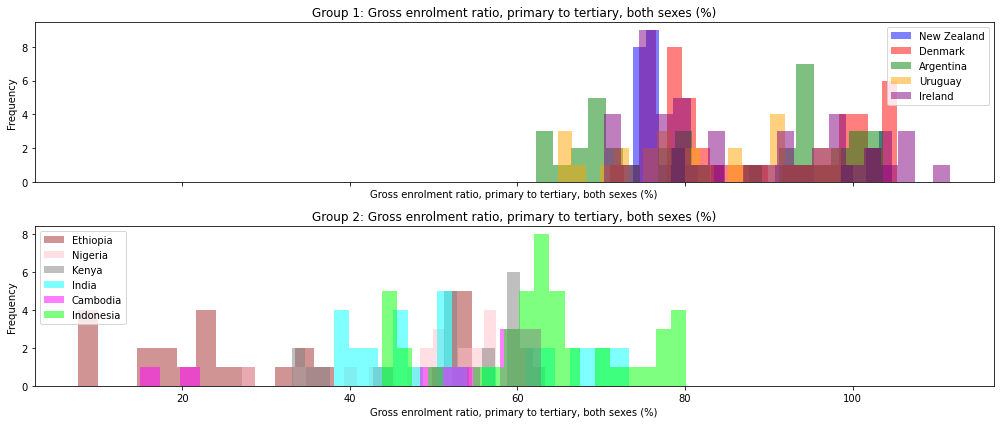

In [160]:
plot_histplot(world_bank_edu, 'Gross enrolment ratio, primary to tertiary, both sexes (%)', 'Gross enrolment ratio, primary to tertiary, both sexes (%)')

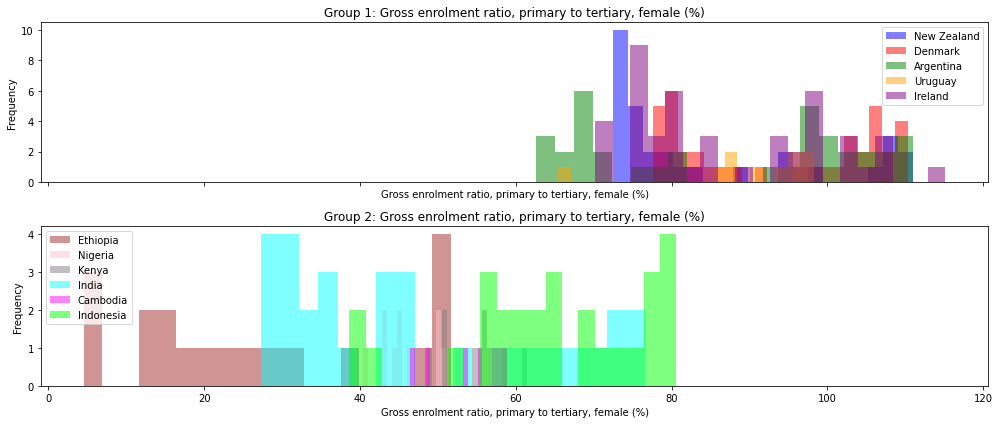

In [161]:
plot_histplot(world_bank_edu, 'Gross enrolment ratio, primary to tertiary, female (%)', 'Gross enrolment ratio, primary to tertiary, female (%)')

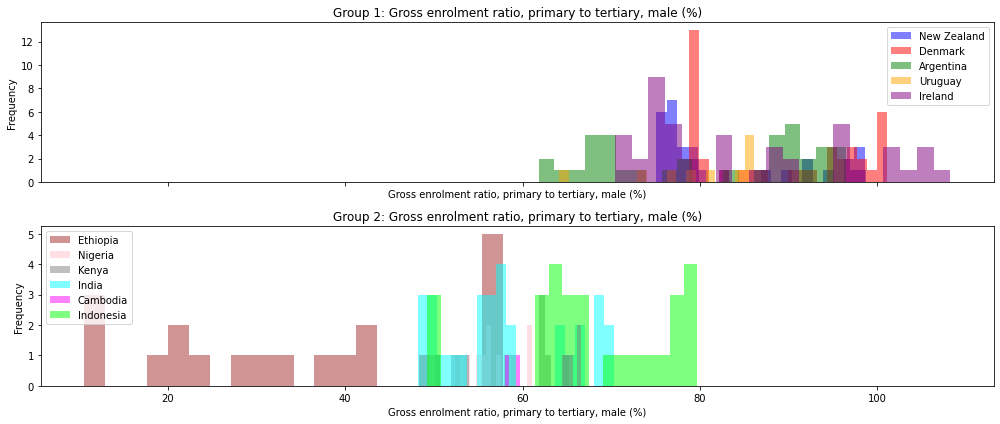

In [162]:
plot_histplot(world_bank_edu, 'Gross enrolment ratio, primary to tertiary, male (%)', 'Gross enrolment ratio, primary to tertiary, male (%)')

In [163]:
#Import World Bank Transport Infrastructure Data
#UnicodeDecodeError you're encountering typically occurs when you're trying to read a CSV file that contains characters or character encodings that aren't compatible with the default UTF-8 encoding

# Detect the encoding of the file
with open('Dataset/archive/World_Bank_Transport_Infrastructure.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read()) #{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [164]:
world_bank_transport = pd.read_csv('Dataset/archive/World_Bank_Transport_Infrastructure.csv', encoding='ISO-8859-1')
world_bank_transport.dropna(inplace = True)
world_bank_transport.columns = [col.split(' [')[0] for col in world_bank_transport.columns]
world_bank_transport.drop('Series Code', axis=1, inplace=True)
world_bank_transport

,Country Name,Country Code,Series Name,2007,2010,2012,2014,2016,2018
0,Afghanistan,AFG,Quality of trade- and transport-related infras...,1.1,1.873596,2.003611,1.818951,1.835473,1.807143
1,Albania,ALB,Quality of trade- and transport-related infras...,2.33333,2.144558,2.426877,..,1.980952,2.293674
2,Algeria,DZA,Quality of trade- and transport-related infras...,1.83333,2.059659,2.016162,2.540816,2.577318,2.421383
3,Angola,AGO,Quality of trade- and transport-related infras...,2.25,1.6875,2.482869,2.105263,2.133789,1.857143
4,Argentina,ARG,Quality of trade- and transport-related infras...,2.80556,2.750209,2.943176,2.831158,2.856412,2.773509
...,...,...,...,...,...,...,...,...,...
163,"Venezuela, RB",VEN,Quality of trade- and transport-related infras...,2.51064,2.442363,2.167156,2.605082,2.345295,2.096936
164,Vietnam,VNM,Quality of trade- and transport-related infras...,2.5,2.561527,2.681854,3.112863,2.695191,3.00549
165,"Yemen, Rep.",YEM,Quality of trade- and transport-related infras...,2.07692,2.348214,2.622449,1.87407,..,2.116794
166,Zambia,ZMB,Quality of trade- and transport-related infras...,2,1.833333,..,2.310606,2.262771,2.303431


In [165]:
world_bank_transport = pd.melt(world_bank_transport, id_vars=['Country Name', 'Country Code', 'Series Name'], var_name='Year', value_name='Value')
world_bank_transport

,Country Name,Country Code,Series Name,Year,Value
0,Afghanistan,AFG,Quality of trade- and transport-related infras...,2007,1.1
1,Albania,ALB,Quality of trade- and transport-related infras...,2007,2.33333
2,Algeria,DZA,Quality of trade- and transport-related infras...,2007,1.83333
3,Angola,AGO,Quality of trade- and transport-related infras...,2007,2.25
4,Argentina,ARG,Quality of trade- and transport-related infras...,2007,2.80556
...,...,...,...,...,...
1003,"Venezuela, RB",VEN,Quality of trade- and transport-related infras...,2018,2.096936
1004,Vietnam,VNM,Quality of trade- and transport-related infras...,2018,3.00549
1005,"Yemen, Rep.",YEM,Quality of trade- and transport-related infras...,2018,2.116794
1006,Zambia,ZMB,Quality of trade- and transport-related infras...,2018,2.303431


In [166]:
world_bank_transport['Value'] = world_bank_transport['Value'].replace('..', pd.NA)

# Drop rows where 'Value' is NaN
world_bank_transport = world_bank_transport.dropna(subset=['Value'])


In [167]:
world_bank_transport = world_bank_transport.pivot_table(index=['Country Name', 'Country Code', 'Year'], columns='Series Name', values='Value')
world_bank_transport.reset_index(inplace=True)
world_bank_transport.rename(columns={'Country Name': 'Country'}, inplace=True)
world_bank_transport

Series Name,Country,Country Code,Year,"Quality of trade- and transport-related infrastructure, score (1=low to 5=high)"
0,Afghanistan,AFG,2007,1.100000
1,Afghanistan,AFG,2010,1.873596
2,Afghanistan,AFG,2012,2.003611
3,Afghanistan,AFG,2014,1.818951
4,Afghanistan,AFG,2016,1.835473
...,...,...,...,...
934,Zimbabwe,ZWE,2007,1.866670
935,Zimbabwe,ZWE,2012,2.200000
936,Zimbabwe,ZWE,2014,2.248457
937,Zimbabwe,ZWE,2016,2.213516


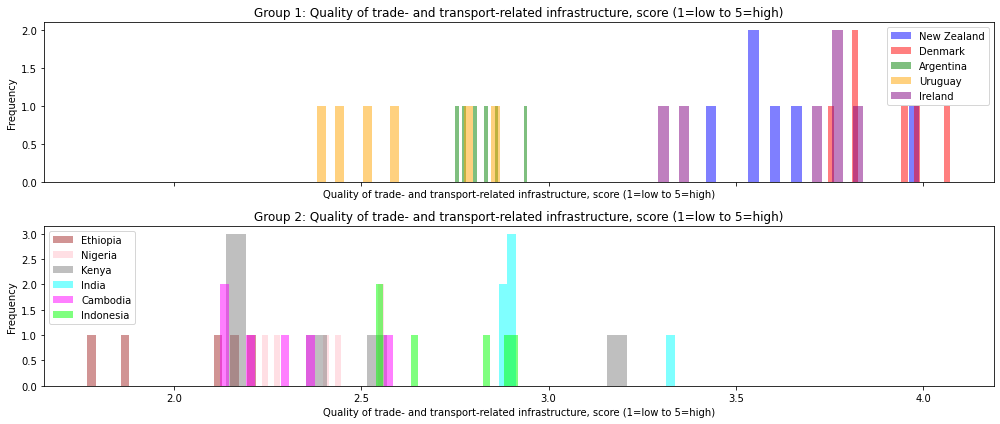

In [168]:
plot_histplot(world_bank_transport, 'Quality of trade- and transport-related infrastructure, score (1=low to 5=high)', 'Quality of trade- and transport-related infrastructure, score (1=low to 5=high)')

In [170]:
#GINI Index
world_GINI_index = pd.read_csv('Dataset/archive/economic-inequality-gini-index.csv')
world_GINI_index = world_GINI_index.rename(columns={'Entity': 'Country Name'})
world_GINI_index.rename(columns={'Country Name': 'Country'}, inplace=True)
world_GINI_index

,Country,Code,Year,Gini coefficient
0,Albania,ALB,1996,0.270103
1,Albania,ALB,2002,0.317390
2,Albania,ALB,2005,0.305957
3,Albania,ALB,2008,0.299847
4,Albania,ALB,2012,0.289605
...,...,...,...,...
2120,Zambia,ZMB,2010,0.556215
2121,Zambia,ZMB,2015,0.571361
2122,Zimbabwe,ZWE,2011,0.431536
2123,Zimbabwe,ZWE,2017,0.443371


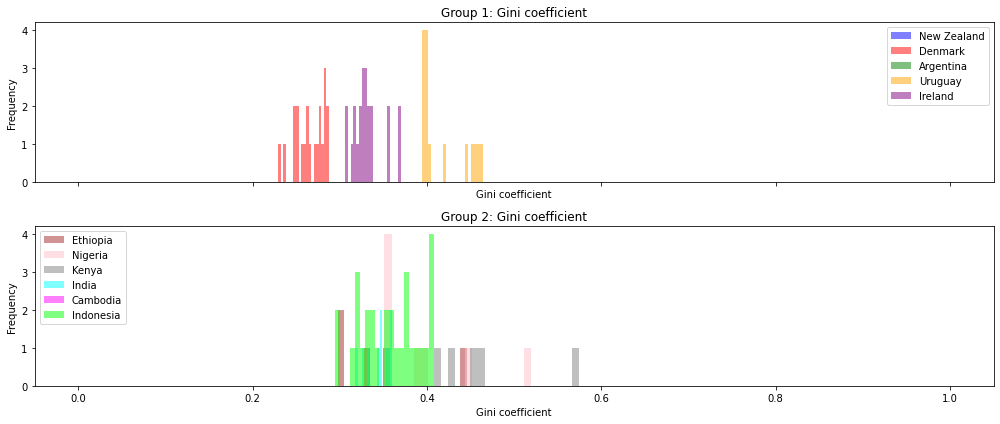

In [171]:
plot_histplot(world_GINI_index, 'Gini coefficient', 'Gini coefficient')